# **Práctica Deep Learning: Redes recurrentes**
# Parte 1 - LSTM

## Carlos Blom-Dahl Ramos y Daniel Lillo Plaza

# Laboratorio

Vamos a hacer predicción del valor de un activo financiero de una empresa a partir del valor de los días anteriores.

In [ ]:
# Importamos librerías
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, LSTM
import numpy as np

# Database
Los datos se pueden descargar de aquí (aunque están en el aula virtual)

https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

# Veamos los datos


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Usamos Pandas para leerlos y mirarlos un poco

import pandas as pd
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep_Learning/Recurrentes/Examples/data/googl.us.txt", delimiter=",")


In [ ]:
# El dataset tiene 5 características por dia
dataset

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0
...,...,...,...,...,...,...,...
3328,2017-11-06,1049.100,1052.59,1042.000,1042.680,913954,0
3329,2017-11-07,1049.650,1053.41,1043.000,1052.390,1303832,0
3330,2017-11-08,1050.050,1062.69,1047.050,1058.290,1214469,0
3331,2017-11-09,1048.000,1050.88,1035.850,1047.720,1793994,0


In [ ]:
# Valores de apertura de cada día
dataset['Open']

0         50.000
1         50.505
2         55.375
3         55.620
4         52.480
          ...   
3328    1049.100
3329    1049.650
3330    1050.050
3331    1048.000
3332    1043.870
Name: Open, Length: 3333, dtype: float64

In [ ]:
aa = dataset['Open']
aa.shape

(3333,)

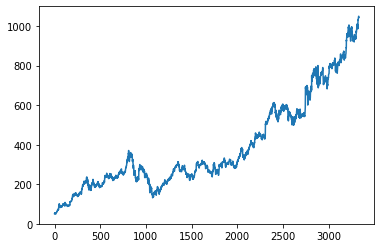

In [ ]:
# Visualizamos los valores de apertura
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(aa)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

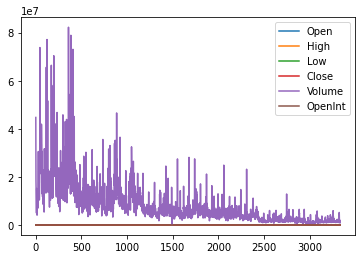

In [ ]:
# Podemos visualizar las 5 características a la vez
%matplotlib inline
plt.figure()
dataset.plot()

In [ ]:
# Cogemos los datos de apertura y de cierre
googl_op = dataset['Open']
googl_cl = dataset['Close']

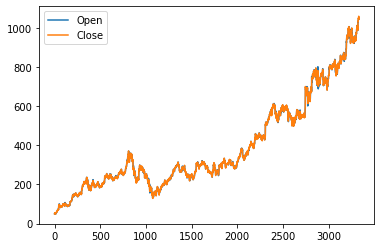

In [ ]:
# Los datos de apertura y de cierre son muy parecidos
%matplotlib inline
plt.figure()
plt.plot(googl_op,label='Open')
plt.plot(googl_cl,label='Close')
plt.legend()

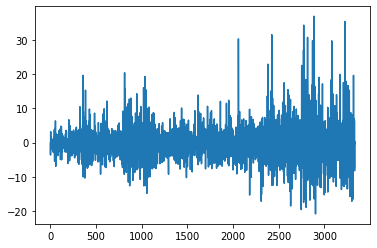

In [ ]:
# Estas son las diferencias entre apertura y cierre
%matplotlib inline
plt.figure()
plt.plot(googl_op-googl_cl)

In [ ]:
# Nos quedamos con los valores de apertura de 10 días como entrada (x), y con el valor de cierre de último día como salida (y)
import numpy as np
xx = googl_op.values[np.arange(0,2000,1)]
yy = googl_cl.values[np.arange(0,2000,1)]
                     
X_train = np.reshape(xx,(200,10,1))
y_train = yy[np.arange(9,2000,10)]
                     
xx = googl_op.values[np.arange(2000,3000,1)]
yy = googl_cl.values[np.arange(2000,3000,1)]
X_test = np.reshape(xx,(100,10,1))
y_test = yy[np.arange(9,1000,10)]

In [ ]:
X_train.shape

(200, 10, 1)

In [ ]:
y_train.shape

(200,)

# MODELO

Definimos un modelo de red neuronal

In [ ]:
# Date cuenta que:
# - Las capas recurrentes tienen la opción "return_sequences" que por defecto está a False.
# - Podemos mezclar capas convolucionales y recurrentes

model = Sequential()
model.add(LSTM(10, input_shape=(10,1))) # NO tienen relación los dos dieces
#model.add(Conv1D(10, 3,input_shape=(10,1)))
#model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist=model.fit(X_train, y_train, batch_size=32, validation_split=0.1, epochs=1000, verbose=1)

Epoch 1/1000
6/6 [==============================] - 0s 23ms/step - loss: 219.9632 - val_loss: 301.4059
Epoch 2/1000
6/6 [==============================] - 0s 17ms/step - loss: 219.9053 - val_loss: 301.3578
Epoch 3/1000
6/6 [==============================] - 0s 12ms/step - loss: 219.8124 - val_loss: 301.2236
Epoch 4/1000
6/6 [==============================] - 0s 17ms/step - loss: 219.7364 - val_loss: 301.1891
Epoch 5/1000
6/6 [==============================] - 0s 13ms/step - loss: 219.7024 - val_loss: 301.1562
Epoch 6/1000
6/6 [==============================] - 0s 12ms/step - loss: 219.6687 - val_loss: 301.1234
Epoch 7/1000
6/6 [==============================] - 0s 11ms/step - loss: 219.6339 - val_loss: 301.0891
Epoch 8/1000
6/6 [==============================] - 0s 14ms/step - loss: 219.5880 - val_loss: 301.0199
Epoch 9/1000
6/6 [==============================] - 0s 15ms/step - loss: 219.5188 - val_loss: 300.9641
Epoch 10/1000
6/6 [==============================] - 0s 16ms/step - loss:

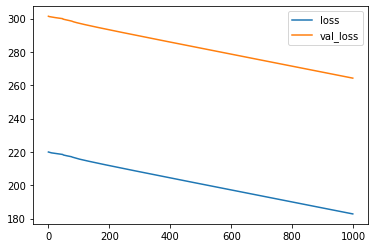

In [ ]:
# Training

%matplotlib inline
plt.figure()
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:

# EVALUACION
score = model.evaluate(X_test, y_test, batch_size=128)

score

1/1 [==============================] - 0s 29ms/step - loss: 512.8100


512.8099975585938

In [ ]:
# Predecir
y_hat = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


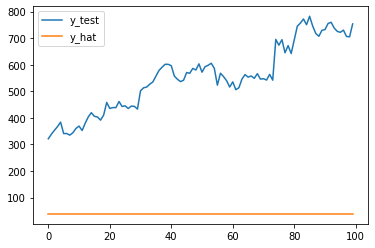

In [ ]:
%matplotlib inline
plt.figure()
plt.plot(y_test, label='y_test')
plt.plot(y_hat,label='y_hat')
plt.legend()

# Ejercicios

1) Crea, entrena y prueba un modelo con varias capas recurrentes. Da el valor de `mae` en entrenamiento y test. 


2) Crea, entrena y prueba un modelo que mezcle capas convolucionales y recurrentes. Da el valor de `mae` en entrenamiento y test. 

3) Crea, entrena y prueba un modelo que mezcle capas convolucionales y recurrentes y que no utilize capas densas. Da el valor de `mae` en entrenamiento y test. 

------------

In [ ]:
# Date cuenta que:
# - Las capas recurrentes tienen la opción "return_sequences" que por defecto está a False.
# - Podemos mezclar capas convolucionales y recurrentes

model = Sequential()
model.add(Dense(10, input_shape=(10,1)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')


In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10, 10)            20        
                                                                 
 flatten_2 (Flatten)         (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 1)                 101       
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist=model.fit(X_train, y_train, batch_size=32, validation_split=0.1, epochs=50, verbose=1)

Epoch 1/50
6/6 [==============================] - 1s 32ms/step - loss: 165.1108 - val_loss: 178.8273
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 111.5116 - val_loss: 105.0299
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 57.0385 - val_loss: 30.8401
Epoch 4/50
6/6 [==============================] - 0s 10ms/step - loss: 13.1855 - val_loss: 29.0113
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 22.3804 - val_loss: 27.9515
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 12.0511 - val_loss: 8.3380
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 9.7290 - val_loss: 10.7003
Epoch 8/50
6/6 [==============================] - 0s 8ms/step - loss: 7.1344 - val_loss: 9.6613
Epoch 9/50
6/6 [==============================] - 0s 7ms/step - loss: 6.9144 - val_loss: 6.7572
Epoch 10/50
6/6 [==============================] - 0s 7ms/step - loss: 5.9712 - val_loss: 6.7407
Epoch 11/50
6/6 [====

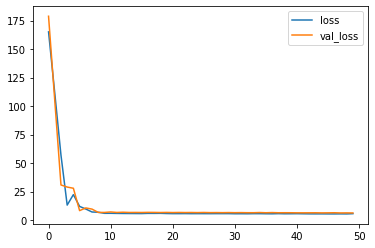

In [ ]:
# Training

%matplotlib inline
plt.figure()
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# Predecir
y_hat = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


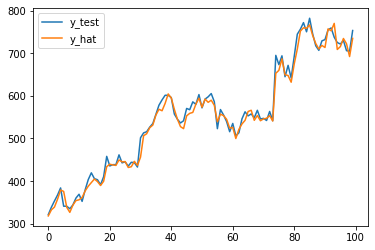

In [ ]:
%matplotlib inline
plt.figure()
plt.plot(y_test, label='y_test')
plt.plot(y_hat,label='y_hat')
plt.legend()

-----------------------

In [ ]:
# Date cuenta que:
# - Las capas recurrentes tienen la opción "return_sequences" que por defecto está a False.
# - Podemos mezclar capas convolucionales y recurrentes

model = Sequential()
model.add(LSTM(10, input_shape=(10,1), return_sequences=True)) # NO tienen relación los dos dieces
model.add(LSTM(10, input_shape=(10,1),return_sequences=True))
model.add(LSTM(10, input_shape=(10,1),return_sequences=True))
model.add(LSTM(10, input_shape=(10,1)))
#model.add(Conv1D(10, 3,input_shape=(10,1)))
#model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 10)            480       
                                                                 
 lstm_7 (LSTM)               (None, 10, 10)            840       
                                                                 
 lstm_8 (LSTM)               (None, 10, 10)            840       
                                                                 
 lstm_9 (LSTM)               (None, 10)                840       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,011
Trainable params: 3,011
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist=model.fit(X_train, y_train, batch_size=32, validation_split=0.1, epochs=2000, verbose=1)

Epoch 1/2000
6/6 [==============================] - 0s 19ms/step - loss: 150.5520 - val_loss: 231.5262
Epoch 2/2000
6/6 [==============================] - 0s 17ms/step - loss: 150.4903 - val_loss: 231.4614
Epoch 3/2000
6/6 [==============================] - 0s 16ms/step - loss: 150.4284 - val_loss: 231.3967
Epoch 4/2000
6/6 [==============================] - 0s 13ms/step - loss: 150.3673 - val_loss: 231.3319
Epoch 5/2000
6/6 [==============================] - 0s 15ms/step - loss: 150.3051 - val_loss: 231.2674
Epoch 6/2000
6/6 [==============================] - 0s 14ms/step - loss: 150.2437 - val_loss: 231.2028
Epoch 7/2000
6/6 [==============================] - 0s 14ms/step - loss: 150.1814 - val_loss: 231.1386
Epoch 8/2000
6/6 [==============================] - 0s 20ms/step - loss: 150.1207 - val_loss: 231.0739
Epoch 9/2000
6/6 [==============================] - 0s 14ms/step - loss: 150.0588 - val_loss: 231.0096
Epoch 10/2000
6/6 [==============================] - 0s 13ms/step - loss:

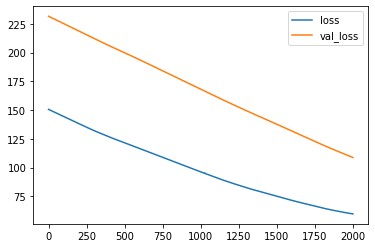

In [ ]:
# Training

%matplotlib inline
plt.figure()
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:

# EVALUACION
score = model.evaluate(X_test, y_test, batch_size=128)

score

1/1 [==============================] - 4s 4s/step - loss: 551.2628


551.2627563476562

In [ ]:
# Predecir
y_hat = model.predict(X_test)

4/4 [==============================] - 1s 10ms/step


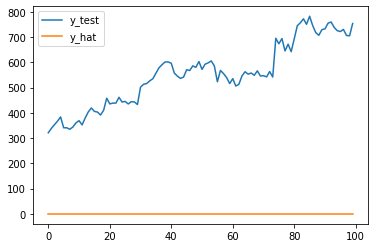

In [ ]:
%matplotlib inline
plt.figure()
plt.plot(y_test, label='y_test')
plt.plot(y_hat,label='y_hat')
plt.legend()

-----------------


In [ ]:
# Date cuenta que:
# - Las capas recurrentes tienen la opción "return_sequences" que por defecto está a False.
# - Podemos mezclar capas convolucionales y recurrentes

model = Sequential()
model.add(Conv1D(10, 3,input_shape=(10,1)))
model.add(Conv1D(10, 3,input_shape=(10,1)))
model.add(LSTM(10, input_shape=(10,1), return_sequences=True)) # NO tienen relación los dos dieces
model.add(LSTM(10, input_shape=(10,1), return_sequences=True))
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 8, 10)             40        
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 10)             310       
                                                                 
 lstm_14 (LSTM)              (None, 6, 10)             840       
                                                                 
 lstm_15 (LSTM)              (None, 6, 10)             840       
                                                                 
 flatten (Flatten)           (None, 60)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 2,091
Trainable params: 2,091
Non-traina

In [ ]:
hist=model.fit(X_train, y_train, batch_size=32, validation_split=0.1, epochs=2000, verbose=1)

Epoch 1/2000
6/6 [==============================] - 6s 222ms/step - loss: 221.2282 - val_loss: 302.6908
Epoch 2/2000
6/6 [==============================] - 0s 11ms/step - loss: 221.2045 - val_loss: 302.6645
Epoch 3/2000
6/6 [==============================] - 0s 12ms/step - loss: 221.1761 - val_loss: 302.6326
Epoch 4/2000
6/6 [==============================] - 0s 11ms/step - loss: 221.1417 - val_loss: 302.5937
Epoch 5/2000
6/6 [==============================] - 0s 12ms/step - loss: 221.0994 - val_loss: 302.5458
Epoch 6/2000
6/6 [==============================] - 0s 11ms/step - loss: 221.0473 - val_loss: 302.4863
Epoch 7/2000
6/6 [==============================] - 0s 13ms/step - loss: 220.9824 - val_loss: 302.4123
Epoch 8/2000
6/6 [==============================] - 0s 12ms/step - loss: 220.9015 - val_loss: 302.3197
Epoch 9/2000
6/6 [==============================] - 0s 11ms/step - loss: 220.8001 - val_loss: 302.2033
Epoch 10/2000
6/6 [==============================] - 0s 11ms/step - loss

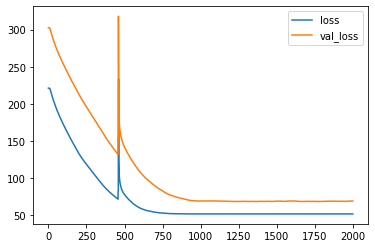

In [ ]:
# Training

%matplotlib inline
plt.figure()
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:

# EVALUACION
score = model.evaluate(X_test, y_test, batch_size=128)

score

1/1 [==============================] - 0s 55ms/step - loss: 317.5771


317.5770568847656

In [ ]:
# Predecir
y_hat = model.predict(X_test)

4/4 [==============================] - 1s 15ms/step


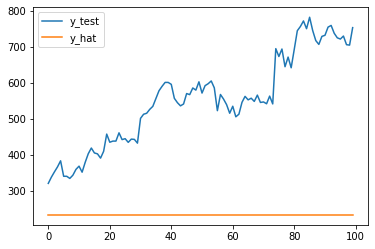

In [ ]:
%matplotlib inline
plt.figure()
plt.plot(y_test, label='y_test')
plt.plot(y_hat,label='y_hat')
plt.legend()